In [45]:
library(repr)
library(tidyverse)
library(rvest)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [46]:
url <- "https://raw.githubusercontent.com/victoriachoi7/group-4-dsci/main/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = FALSE)
colnames(cleveland_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_bp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [47]:
cleveland_wrangled <-cleveland_data|>
            select("sex", "num", "chol", "restecg", "thalach")|>
            mutate(sex = as_factor(sex))      
cleveland_wrangled

sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,233,2,150
1,2,286,2,108
1,1,229,2,129
⋮,⋮,⋮,⋮,⋮
1,3,131,0,115
0,1,236,2,174
1,0,175,0,173


In [48]:
set.seed 
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = sex)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
cleveland_training
cleveland_testing

function (seed, kind = NULL, normal.kind = NULL, sample.kind = NULL) 
{
    kinds <- c("Wichmann-Hill", "Marsaglia-Multicarry", "Super-Duper", 
        "Mersenne-Twister", "Knuth-TAOCP", "user-supplied", "Knuth-TAOCP-2002", 
        "L'Ecuyer-CMRG", "default")
    n.kinds <- c("Buggy Kinderman-Ramage", "Ahrens-Dieter", "Box-Muller", 
        "user-supplied", "Inversion", "Kinderman-Ramage", "default")
    s.kinds <- c("Rounding", "Rejection", "default")
    if (length(kind)) {
        if (!is.character(kind) || length(kind) > 1L) 
            stop("'kind' must be a character string of length 1 (RNG to be used).")
        if (is.na(i.knd <- pmatch(kind, kinds) - 1L)) 
            stop(gettextf("'%s' is not a valid abbreviation of an RNG", 
                kind), domain = NA)
        if (i.knd == length(kinds) - 1L) 
            i.knd <- -1L
    }
    else i.knd <- NULL
    if (!is.null(normal.kind)) {
        if (!is.character(normal.kind) || length(normal.kind) != 
            1L) 
            stop("'normal.kind' must be a character string of length 1")
        normal.kind <- pmatch(normal.kind, n.kinds) - 1L
        if (is.na(normal.kind)) 
            stop(gettextf("'%s' is not a valid choice", normal.kind), 
                domain = NA)
        if (normal.kind == 0L) 
            stop("buggy version of Kinderman-Ramage generator is not allowed", 
                domain = NA)
        if (normal.kind == length(n.kinds) - 1L) 
            normal.kind <- -1L
    }
    if (!is.null(sample.kind)) {
        if (!is.character(sample.kind) || length(sample.kind) != 
            1L) 
            stop("'sample.kind' must be a character string of length 1")
        sample.kind <- pmatch(sample.kind, s.kinds) - 1L
        if (is.na(sample.kind)) 
            stop(gettextf("'%s' is not a valid choice", sample.kind), 
                domain = NA)
        if (sample.kind == 0L) 
            warning("non-uniform 'Rounding' sampler used", domain = NA)
        if (sample.kind == length(s.kinds) - 1L) 
            sample.kind <- -1L
    }
    .Internal(set.seed(seed, i.knd, normal.kind, sample.kind))
}
<bytecode: 0x564ddb864a50>
<environment: namespace:base>

sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,204,2,172
0,3,268,2,160
0,0,294,2,153
⋮,⋮,⋮,⋮,⋮
1,3,176,2,90
1,2,193,0,141
1,3,131,0,115


sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,354,0,163
1,1,203,2,155
1,0,263,0,173
⋮,⋮,⋮,⋮,⋮
1,1,264,0,132
0,1,236,2,174
1,0,175,0,173


In [49]:
cleveland_sum <- cleveland_wrangled |>
        group_by(sex)|>
        summarize(average_chol = mean(chol), num_median = median(num), restecg_median = median(restecg))
cleveland_sum
#was trying to find out how to get the averages for each obs but realized that the disease can't really have a decimal value?

sex,average_chol,num_median,restecg_median
<fct>,<dbl>,<dbl>,<dbl>
0,261.7526,0,0.0
1,239.6019,1,1.5


In [50]:
cleveland_obs <- cleveland_training |>
        group_by(sex)|>
        summarize(count = n())
cleveland_obs
#wasnt sure how to get number of obs for each column

sex,count
<fct>,<int>
0,72
1,154


In [51]:
cleveland_missing <- sum(is.na(cleveland_training))
cleveland_missing
#wanted to add this to the above table, but above table wasn't working so this is it for now

[1] 0

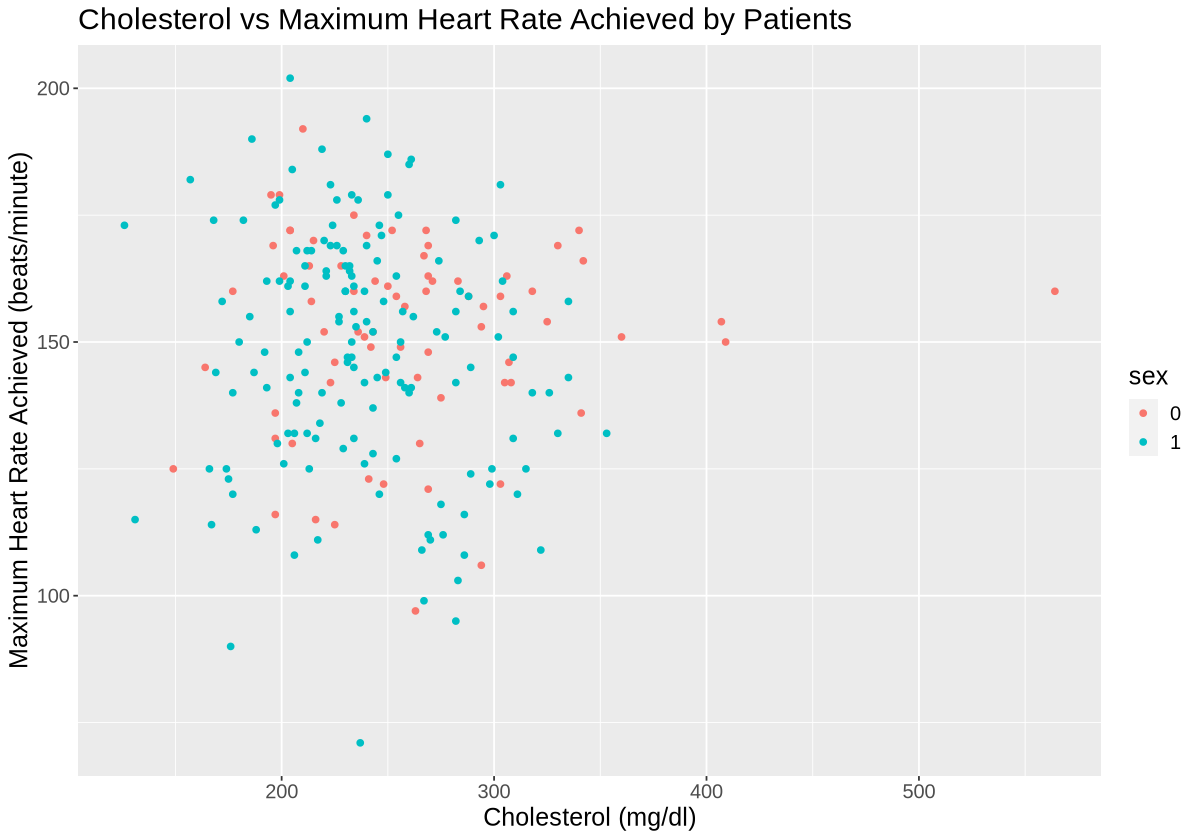

In [60]:
#Here's a graph tho cause ik how to do that at least
options(repr.plot.width = 10, repr.plot.height = 7)
cleveland_viz <- cleveland_training|>
        ggplot(aes(x = chol, y = thalach, colour = sex)) +
            geom_point()+
            labs(x = "Cholesterol (mg/dl)",
                 y = "Maximum Heart Rate Achieved (beats/minute)",
                 colour = "sex")+
        ggtitle("Cholesterol vs Maximum Heart Rate Achieved by Patients")+
        theme(text = element_text(size = 15))
cleveland_viz
#haha this graph is fricked i dont think theres any relation